In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
url  = 'https://raw.githubusercontent.com/theanalytix/DAInterns-CIEI/main/Datasets/ICMR.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      267 non-null    object
 1   address  267 non-null    object
 2   pincode  267 non-null    int64 
 3   city     267 non-null    object
 4   state    267 non-null    object
 5   type     267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


In [8]:
df.describe()

,pincode
count,267.000000
mean,457908.602996
std,211021.221804
min,110001.000000
25%,303511.500000
50%,462030.000000
75%,622510.500000
max,846003.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

lab        0
address    0
pincode    0
city       0
state      0
type       0
dtype: int64

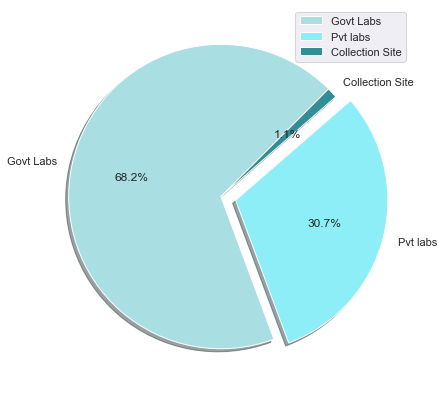

In [34]:
#Overall Analysis
#types of ICMR approved labs
plt.figure(figsize=(12,7))
explode=[0,0.1,0]
color=['#A9DFE3','#8DEEF7','#2F8E96']
plt.pie(df['type'].value_counts(),explode=explode,labels=['Govt Labs','Pvt labs','Collection Site'],colors=color,startangle=45,autopct='%1.1f%%',shadow=True)
plt.legend()

<AxesSubplot:>

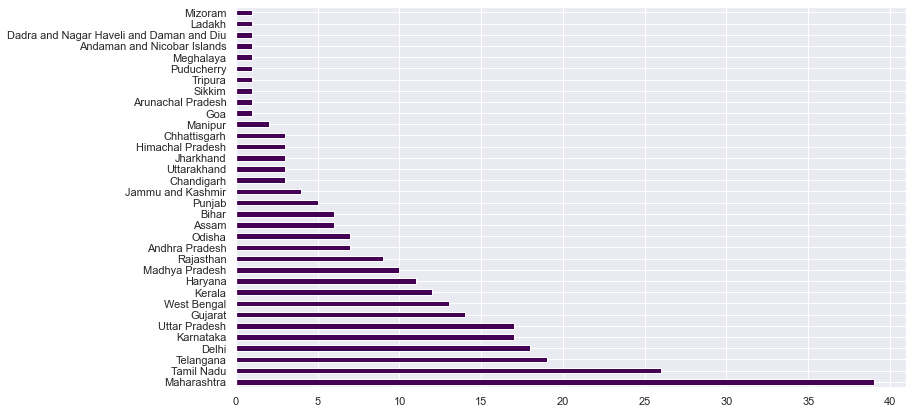

In [20]:
#Number of labs in different states
sns.set_theme()
plt.figure(figsize=(12,7))
df['state'].value_counts().plot(kind='barh',cmap='viridis')

Text(0.5, 1.0, 'Top 10 states with the highest number of labs')

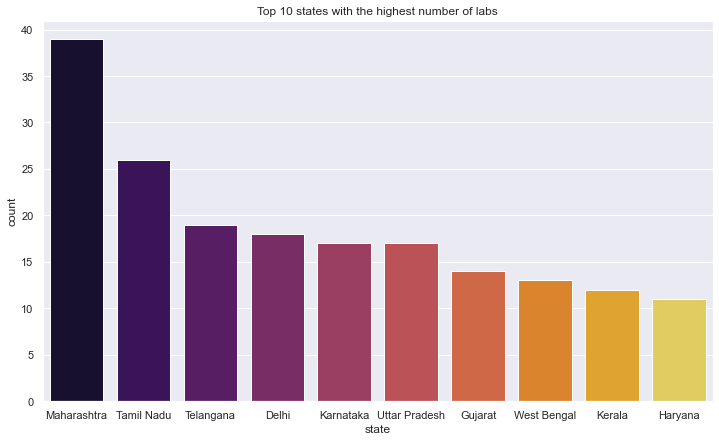

In [14]:
#Top 10 states with the highest number of labs
sns.set_theme()
plt.figure(figsize=(12,7))
sns.countplot(x = df['state'], order=df['state'].value_counts().index[:10],palette='inferno')
plt.title('Top 10 states with the highest number of labs')

Text(0.5, 1.0, 'Top 10 cities with the highest number of labs')

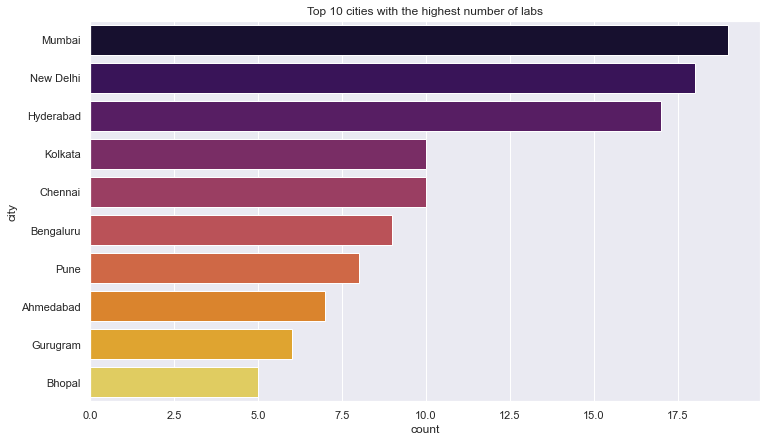

In [15]:
#Top 10 cities with the highest number of labs
sns.set_theme()
plt.figure(figsize=(12,7))
sns.countplot(y = df['city'], order=df['city'].value_counts().index[:10],palette='inferno')
plt.title('Top 10 cities with the highest number of labs')

In [86]:
#states with different types of lab
grp = df.groupby('state')
grp = grp['type'].value_counts().unstack()

<Figure size 1296x720 with 0 Axes>

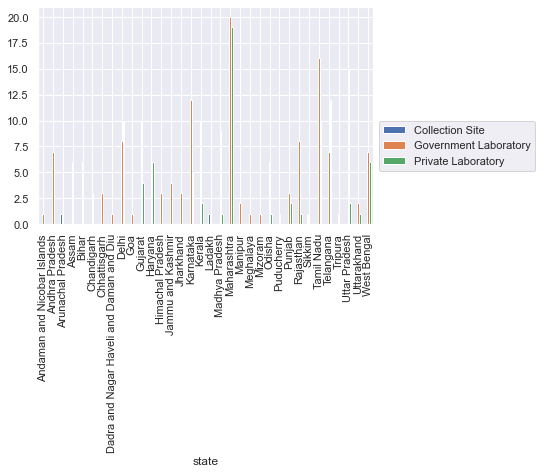

In [87]:
sns.set_theme()
plt.figure(figsize=(18,10))
grp.plot(kind='bar')
plt.legend(bbox_to_anchor=(1, 0.5))